# This is homework 7 of Machine Learning
### SVM and KMeans on Multiclass & Multilabel Classification
#### William Lu
#### 7424831487
#### WilliamLu1999

In [1]:
### set up and download
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import glob
import os
import math
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
columns = df.columns
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [9]:
# creating training and testing set randomly
df_train = df.sample(frac=0.7)
df_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
666,1.0,0.458037,0.654668,0.528653,-0.256128,-0.028698,0.461070,0.084144,-0.231819,0.201937,...,0.066759,0.061213,-0.094423,-0.041357,0.089459,0.029922,Leptodactylidae,Adenomera,AdenomeraAndre,8
4722,1.0,-0.275398,-0.298004,0.057105,0.040976,0.116133,0.245736,0.133220,0.100698,0.099051,...,0.097285,0.094750,0.047882,0.006740,-0.050198,-0.055385,Hylidae,Dendropsophus,HylaMinuta,26
2215,1.0,-0.043341,0.125430,0.477853,0.038223,-0.046869,-0.102913,0.088976,0.305993,0.054582,...,0.101809,0.021537,-0.003238,-0.089118,0.021176,0.115117,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
2392,1.0,0.185915,0.234852,0.661970,0.241409,-0.061044,-0.121993,0.188929,0.384096,-0.058707,...,0.127983,-0.004386,-0.099154,-0.112459,0.089613,0.084666,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
481,1.0,0.496807,0.685296,0.591063,-0.181237,-0.083632,0.515514,0.065518,-0.329226,0.141749,...,-0.011189,0.174623,-0.058488,-0.060974,0.121261,0.100330,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1.0,0.306417,0.091391,0.566277,0.234966,0.060221,-0.043801,0.117246,0.115605,-0.128372,...,0.134260,0.012380,0.014913,-0.064312,0.047249,0.158817,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
5166,1.0,0.834905,0.827625,0.345328,-0.158341,0.166525,0.196512,-0.123202,-0.116426,0.248823,...,-0.033000,-0.226266,0.002881,0.120060,-0.063978,-0.058281,Hylidae,Hypsiboas,HypsiboasCinerascens,36
1751,1.0,0.112691,0.067212,0.609576,0.223947,0.015312,-0.240752,-0.092250,0.242391,0.100974,...,0.226513,0.053739,-0.122134,-0.175865,0.048313,0.270369,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
2705,1.0,0.366305,0.381524,0.567989,0.155643,-0.011397,-0.028166,0.105581,0.245823,-0.039093,...,0.207461,-0.037736,-0.081542,-0.077337,0.041750,0.108059,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


In [10]:
df_test =  df.loc[~df.index.isin(df_train.index)]
df_test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1
10,1.0,0.148539,-0.096910,0.257523,0.260881,0.312603,0.134134,-0.216262,-0.189334,0.261960,...,-0.034082,-0.120716,-0.100800,-0.001992,0.111462,0.103637,Leptodactylidae,Adenomera,AdenomeraAndre,1
17,1.0,0.146299,-0.075174,0.291935,0.367094,0.268947,0.054049,-0.242952,-0.232617,0.235722,...,-0.051154,-0.038580,-0.022396,-0.018891,0.051480,0.031871,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,1.0,-0.512794,0.056322,0.259677,0.030140,0.369783,-0.117154,-0.189292,0.248948,0.193566,...,0.096589,0.255261,0.047039,-0.016643,-0.046598,-0.055862,Hylidae,Scinax,ScinaxRuber,60
7188,1.0,-0.512599,-0.171956,0.325813,0.169600,0.421567,-0.123749,-0.298284,0.089382,0.243902,...,0.021225,0.157321,0.042847,0.006852,0.005439,-0.013693,Hylidae,Scinax,ScinaxRuber,60
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60


##### (b) (i) What's exact match and hamming score/loss methods for evaluting label classification?

The exact match method finds the number of equivalent result in both y-test and y-pred, no partially correct results are counted, then find the average. Hamming loss is the fraction of wrong labels to the total number of labels. Hamming loss computes the average hamming distance between two samples.
Reference: https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

##### (ii) Train a SVM for each of the labels. Use Gaussian Kernels and one vs all classifiers.

In [94]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss, silhouette_score, accuracy_score
from imblearn.over_sampling import SMOTE

In [99]:
gamma = np.linspace(0.1,2,20)
C = np.logspace(-3, 6, 20)
params ={'estimator__gamma':gamma,'estimator__C':C}
C

array([1.00000000e-03, 2.97635144e-03, 8.85866790e-03, 2.63665090e-02,
       7.84759970e-02, 2.33572147e-01, 6.95192796e-01, 2.06913808e+00,
       6.15848211e+00, 1.83298071e+01, 5.45559478e+01, 1.62377674e+02,
       4.83293024e+02, 1.43844989e+03, 4.28133240e+03, 1.27427499e+04,
       3.79269019e+04, 1.12883789e+05, 3.35981829e+05, 1.00000000e+06])

NO Standardized

Family:

In [100]:
svm = OneVsRestClassifier(SVC(kernel='rbf'))
model = GridSearchCV(svm,param_grid=params,cv=KFold(10))
df_train_X = df_train.iloc[:,0:22]
df_train_y = df_train.iloc[:,22:]
df_test_X = df_test.iloc[:,0:22]
df_test_y = df_test.iloc[:,22:]

In [101]:
SVM_family = model.fit(df_train_X,df_train_y['Family'])
params_Family = SVM_family.best_params_

{'estimator__C': 18.32980710832434, 'estimator__gamma': 1.8}


In [107]:
y_pred_Family = SVM_family.predict(df_test_X)
exact_match_loss_Family = 1-accuracy_score(y_pred_Family,df_test_y['Family'])
hamming_loss_Family = hamming_loss(y_pred_Family,df_test_y['Family'])

In [108]:
print('SVM Penalty is:',params_Family['estimator__C'])
Gaussain_Kernel_Width_Family  = 1/np.sqrt(params_Family['estimator__gamma']*2)
print('Width of Gaussian Kernel is:',Gaussain_Kernel_Width_Family)
print('Exact match loss for Family is:',exact_match_loss_Family)
print('Hamming loss for Family is:',hamming_loss_Family)

SVM Penalty is: 18.32980710832434
Width of Gaussian Kernel is: 0.5270462766947299
Exact match loss for Family is: 0.004168596572487249
Hamming loss for Family is: 0.0041685965724872626


Genus

In [109]:
SVM_Genus = model.fit(df_train_X,df_train_y['Genus'])
params_Genus = SVM_Genus.best_params_

In [111]:
y_pred_Genus = SVM_Genus.predict(df_test_X)
exact_match_loss_Genus = 1-accuracy_score(y_pred_Genus,df_test_y['Genus'])
hamming_loss_Genus = hamming_loss(y_pred_Genus,df_test_y['Genus'])
print('SVM Penalty is:',params_Genus['estimator__C'])
Gaussian_Kernel_Width_Genus  = 1/np.sqrt(params_Genus['estimator__gamma']*2)
print('Width of Gaussian Kernel is:',Gaussian_Kernel_Width_Genus)
print('Exact match loss for Genus is:',exact_match_loss_Genus)
print('Hamming loss for Genus is:',hamming_loss_Genus)

SVM Penalty is: 18.32980710832434
Width of Gaussian Kernel is: 0.5773502691896258
Exact match loss for Genus is: 0.007410838351088467
Hamming loss for Genus is: 0.007410838351088467


Species

In [112]:
SVM_Species = model.fit(df_train_X,df_train_y['Species'])
params_Species = SVM_Species.best_params_

In [113]:
y_pred_Species = SVM_Species.predict(df_test_X)
exact_match_loss_Species = 1-accuracy_score(y_pred_Species,df_test_y['Species'])
hamming_loss_Species = hamming_loss(y_pred_Species,df_test_y['Species'])
print('SVM Penalty is:',params_Species['estimator__C'])
Gaussian_Kernel_Width_Species  = 1/np.sqrt(params_Species['estimator__gamma']*2)
print('Width of Gaussian Kernel is:',Gaussian_Kernel_Width_Species)
print('Exact match loss for Genus is:',exact_match_loss_Species)
print('Hamming loss for Genus is:',hamming_loss_Species)

SVM Penalty is: 54.555947811685144
Width of Gaussian Kernel is: 0.5
Exact match loss for Genus is: 0.006021306160259421
Hamming loss for Genus is: 0.006021306160259379


##### (iii) L-1 Penalized SVM with standardization.

Standardize the data

Family

In [114]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(df_train_X)
train_X = scaler.transform(df_train_X)
test_X = scaler.transform(df_test_X)

In [116]:
SVM_L1 = LinearSVC(penalty='l1',dual=False) # since the number of samples>number of features
params_L1= {'C':C}
model_L1 = GridSearchCV(SVM_L1,params_L1,cv=KFold(10))

In [117]:
SVM_Family_L1 = model_L1.fit(train_X,df_train_y['Family'])
params_Family_L1 = SVM_Family_L1.best_params_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [118]:
y_pred_Family_L1 = SVM_Family_L1.predict(test_X)
exact_match_loss_Family_L1 = 1-accuracy_score(y_pred_Family_L1,df_test_y['Family'])
hamming_loss_Family_L1 = hamming_loss(y_pred_Family_L1,df_test_y['Family'])
print('SVM Penalty with L1 and standardized data is:',params_Family_L1['C'])
print('Exact match loss for Family with L1 and standardized data is:',exact_match_loss_Family_L1)
print('Hamming loss for Family with L1 and standardized data is:',hamming_loss_Family_L1)

SVM Penalty with L1 and standardized data is: 0.6951927961775606
Exact match loss for Family with L1 and standardized data is: 0.06484483557202414
Hamming loss for Family with L1 and standardized data is: 0.06484483557202408


Genus

In [119]:
SVM_Genus_L1 = model_L1.fit(train_X,df_train_y['Genus'])
params_Genus_L1 = SVM_Genus_L1.best_params_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [120]:
y_pred_Genus_L1 = SVM_Genus_L1.predict(test_X)
exact_match_loss_Genus_L1 = 1-accuracy_score(y_pred_Genus_L1,df_test_y['Genus'])
hamming_loss_Genus_L1 = hamming_loss(y_pred_Genus_L1,df_test_y['Genus'])
print('SVM Penalty with L1 and standardized data is:',params_Genus_L1['C'])
print('Exact match loss for Genus with L1 and standardized data is:',exact_match_loss_Genus_L1)
print('Hamming loss for Genus with L1 and standardized data is:',hamming_loss_Genus_L1)

SVM Penalty with L1 and standardized data is: 18.32980710832434
Exact match loss for Genus with L1 and standardized data is: 0.044001852709587785
Hamming loss for Genus with L1 and standardized data is: 0.04400185270958777


Species

In [121]:
SVM_Species_L1 = model_L1.fit(train_X,df_train_y['Species'])
params_Species_L1 = SVM_Species_L1.best_params_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [122]:
y_pred_Species_L1 = SVM_Species_L1.predict(test_X)
exact_match_loss_Species_L1 = 1-accuracy_score(y_pred_Species_L1,df_test_y['Species'])
hamming_loss_Species_L1 = hamming_loss(y_pred_Species_L1,df_test_y['Species'])
print('SVM Penalty with L1 and standardized data is:',params_Species_L1['C'])
print('Exact match loss for Species with L1 and standardized data is:',exact_match_loss_Species_L1)
print('Hamming loss for Species with L1 and standardized data is:',hamming_loss_Species_L1)

SVM Penalty with L1 and standardized data is: 6.158482110660261
Exact match loss for Species with L1 and standardized data is: 0.03427512737378413
Hamming loss for Species with L1 and standardized data is: 0.03427512737378416


##### (iv) SMOTE to rescue Class Imbalance L1 Penalized

In [127]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
train_X_Family_sm, train_y_Family_sm = sm.fit_resample(train_X,df_train_y['Family'])
train_X_Genus_sm, train_y_Genus_sm = sm.fit_resample(train_X,df_train_y['Genus'])
train_X_Species_sm, train_y_Species_sm = sm.fit_resample(train_X,df_train_y['Species'])

Family L1 SVM SMOTE

In [129]:
SVM_L1_sm = LinearSVC(penalty='l1',dual=False) # since the number of samples>number of features
params_L1_sm= {'C':C}
model_L1_sm = GridSearchCV(SVM_L1_sm,params_L1_sm,cv=KFold(10))

In [130]:
SVM_Family_L1_sm = model_L1_sm.fit(train_X_Family_sm,train_y_Family_sm)
params_Family_L1_sm = SVM_Family_L1_sm.best_params_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [131]:
y_pred_Family_L1_sm = SVM_Family_L1_sm.predict(test_X)
exact_match_loss_Family_L1_sm = 1-accuracy_score(y_pred_Family_L1_sm,df_test_y['Family'])
hamming_loss_Family_L1_sm = hamming_loss(y_pred_Family_L1_sm,df_test_y['Family'])
print('SVM Penalty with L1 and standardized data with SMOTE is:',params_Family_L1_sm['C'])
print('Exact match loss for Family with L1 and standardized data with SMOTE is:',exact_match_loss_Family_L1_sm)
print('Hamming loss for Family with L1 and standardized data with SMOTE is:',hamming_loss_Family_L1_sm)

SVM Penalty with L1 and standardized data with SMOTE is: 6.158482110660261
Exact match loss for Family with L1 and standardized data with SMOTE is: 0.0833719314497453
Hamming loss for Family with L1 and standardized data with SMOTE is: 0.08337193144974525


Genus L1 SVM SMOTE

In [132]:
SVM_Genus_L1_sm = model_L1_sm.fit(train_X_Genus_sm,train_y_Genus_sm)
params_Genus_L1_sm = SVM_Genus_L1_sm.best_params_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [133]:
y_pred_Genus_L1 = SVM_Genus_L1.predict(test_X)
exact_match_loss_Genus_L1 = 1-accuracy_score(y_pred_Genus_L1,df_test_y['Genus'])
hamming_loss_Genus_L1 = hamming_loss(y_pred_Genus_L1,df_test_y['Genus'])
print('SVM Penalty with L1 and standardized data is:',params_Genus_L1['C'])
print('Exact match loss for Genus with L1 and standardized data is:',exact_match_loss_Genus_L1)
print('Hamming loss for Genus with L1 and standardized data is:',hamming_loss_Genus_L1)

SVM Penalty with L1 and standardized data is: 18.32980710832434
Exact match loss for Genus with L1 and standardized data is: 1.0
Hamming loss for Genus with L1 and standardized data is: 1.0


Species L1 SVM SMOTE

In [134]:
SVM_Species_L1_sm = model_L1_sm.fit(train_X_Species_sm,train_y_Species_sm)
params_Species_L1 = SVM_Species_L1_sm.best_params_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [135]:
y_pred_Species_L1 = SVM_Species_L1.predict(test_X)
exact_match_loss_Species_L1 = 1-accuracy_score(y_pred_Species_L1,df_test_y['Species'])
hamming_loss_Species_L1 = hamming_loss(y_pred_Species_L1,df_test_y['Species'])
print('SVM Penalty with L1 and standardized data is:',params_Species_L1['C'])
print('Exact match loss for Species with L1 and standardized data is:',exact_match_loss_Species_L1)
print('Hamming loss for Species with L1 and standardized data is:',hamming_loss_Species_L1)

SVM Penalty with L1 and standardized data is: 1438.449888287663
Exact match loss for Species with L1 and standardized data is: 0.03427512737378413
Hamming loss for Species with L1 and standardized data is: 0.03427512737378416


Summary:

On average, for each label, Gaussain Kernel SVM performs better than SVM L1 and SVM L1 SMOTE. Then goes L1 penalized SVM. Then L1 penalized SVM with SMOTE.

##### 2. K Means Clustering on a Multi-Class and Multi-label Data Set

In [11]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import hamming_loss
import random
import statistics

(a) Choose k from 1 to 50 automatically based on Silhouettes.

In [20]:
df_ = df.drop('RecordID',axis=1) # we don't need this for now
# define X and y
X = df_.iloc[:,0:22]
y = df_.iloc[:,22:]
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [29]:
silhouettes =[]
for i in range(1,51): # perform monte-carlo simulation 50 times
    silhouettes_iterate = []
    for k in range(2,51): # choose k from 1 to 50 again
        k_means = KMeans(n_clusters=k,init='k-means++').fit(X)
        labels_kmeans = k_means.labels_
        silhouettes_iterate.append(metrics.silhouette_score(X,labels_kmeans))
    largest_sil = max(silhouettes_iterate)
    k_optimal = silhouettes_iterate.index(largest_sil)
    k_optimal+=2 # because we are only getting the index. The best k should add 2 on the index.
    temp_tuple= (k_optimal,largest_sil)
    silhouettes.append(temp_tuple)
# reference: https://stackoverflow.com/questions/51382250/valueerror-number-of-labels-is-1-valid-values-are-2-to-n-samples-1-inclusiv
silhouettes # gives us the best optimal k and 

[(4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.38523395202479643),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.37867825251598397),
 (4, 0.37888514720477384),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.37863353074850936),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.37866647707550904),
 (4, 0.3787509343305295),
 (4, 0.3840178083645658),
 (4, 0.37866647707550904),
 (4, 0.3787509343305295),
 (4, 0.37863353074850936),
 (4, 0.3787509343305295),
 (4, 0.37867825251598397),
 (4, 0.37876308666591424),
 (4, 0.3787509343305295),
 (4, 0.37867825251598397),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),
 (4, 0.37867825251598397),
 (4, 0.3787509343305295),
 (4, 0.37876308666591424),
 (4, 0.3787509343305295),
 (4, 0.3787509343305295),


Hence, the optimal k is 4 with max silhouettes 0.38523395202479643.

(b) In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [89]:
for i in range(1,51): # perform monte-carlo simulation 50 times
    k_means_final = KMeans(n_clusters=4).fit(X)
    cluster_labels = k_means_final.labels_
    label_col = pd.DataFrame({'label':cluster_labels.tolist()})
    cluster = pd.concat([df_,label_col],axis = 1)
    cluster['label'].value_counts()
    print('Monte Carlo Simulation number:',i)
    for k in range(4):
        group = cluster[cluster['label']==k]
        print('Cluster',k+1)
        # getting the largest value
        # reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
        print('The majority in family is:',group['Family'].value_counts().index[0])
        print('The majority in genus is:',group['Genus'].value_counts().index[0])
        print('The majority in species is:',group['Species'].value_counts().index[0])

Monte Carlo Simulation number: 1
Cluster 1
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 2
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCordobae
Cluster 3
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Cluster 4
The majority in family is: Dendrobatidae
The majority in genus is: Ameerega
The majority in species is: Ameeregatrivittata
Monte Carlo Simulation number: 2
Cluster 1
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 2
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Cluster 3
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraAndre
Cl

Monte Carlo Simulation number: 16
Cluster 1
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Cluster 2
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 3
The majority in family is: Dendrobatidae
The majority in genus is: Ameerega
The majority in species is: Ameeregatrivittata
Cluster 4
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCordobae
Monte Carlo Simulation number: 17
Cluster 1
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCordobae
Cluster 2
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 3
The majority in family is: Dendrobatidae
The majority in genus is: Ameerega
The majority in species is: Ameeregatrivittata
Cl

Monte Carlo Simulation number: 31
Cluster 1
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 2
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraAndre
Cluster 3
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCordobae
Cluster 4
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Monte Carlo Simulation number: 32
Cluster 1
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCordobae
Cluster 2
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 3
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Cluste

Monte Carlo Simulation number: 46
Cluster 1
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCordobae
Cluster 2
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus
Cluster 3
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Cluster 4
The majority in family is: Dendrobatidae
The majority in genus is: Ameerega
The majority in species is: Ameeregatrivittata
Monte Carlo Simulation number: 47
Cluster 1
The majority in family is: Hylidae
The majority in genus is: Hypsiboas
The majority in species is: HypsiboasCinerascens
Cluster 2
The majority in family is: Dendrobatidae
The majority in genus is: Ameerega
The majority in species is: Ameeregatrivittata
Cluster 3
The majority in family is: Leptodactylidae
The majority in genus is: Adenomera
The majority in species is: AdenomeraHylaedactylus

c

In [161]:
res=[]
cluster_num={}
for i in range(1,51): # perform monte-carlo simulation 50 times
    k_means_final_2 = KMeans(n_clusters=4).fit(X)
    cluster_labels_2 = k_means_final_2.labels_
    cluster_num[i]=cluster_labels_2 # storing to a dictionary for easier manipulation
    res.append(k_means_final_2.predict(X))

In [215]:
cluster_num

{1: array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 2: array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 3: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 4: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 5: array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 6: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 7: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 8: array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 9: array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 10: array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 11: array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 12: array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 13: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 14: array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 15: array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 16: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 17: array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 18: array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 19: array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 20: array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 21: arra

In [221]:
family_loss=[]
genus_loss=[]
species_loss=[]
for i in range(1,51):
    pred_Family = np.array(cluster_num[1])
    pred_Genus = np.array(cluster_num[2])
    pred_Species = np.array(cluster_num[50])
    y_Family = np.array(y['Family'])
    y_Genus = np.array(y['Genus'])
    y_Species = np.array(y['Species'])
    family_loss.append(hamming_loss(pred_Family,y_Family))
    genus_loss.append(hamming_loss(pred_Genus,y_Genus))
    species_loss.append(hamming_loss(pred_Species,y_Species))

In [222]:
genus_loss_avg = sum(genus_loss)/len(genus_loss)
species_loss_avg = sum(species_loss)/len(species_loss)
family_loss_avg = sum(family_loss)/len(family_loss)
print((genus_loss_avg+species_loss_avg+family_loss_avg)/3) #avg hamming loss
print(1-(genus_loss_avg+species_loss_avg+family_loss_avg)/3) #avg hamming score

0.8793606671299514
0.12063933287004858


##### ISLR 12.6.2

(a)

In [39]:
import scipy.cluster.hierarchy as shc
data =np.array([[0, 0.3, 0.4, 0.7], [0.3, 0, 0.5, 0.8],[0.4, 0.5, 0.0, 0.45],[0.7, 0.8, 0.45, 0.0]])
data

array([[0.  , 0.3 , 0.4 , 0.7 ],
       [0.3 , 0.  , 0.5 , 0.8 ],
       [0.4 , 0.5 , 0.  , 0.45],
       [0.7 , 0.8 , 0.45, 0.  ]])

/var/folders/wf/cgnnphfs6fjbzlg451nf6y8w0000gn/T/ipykernel_66597/3234163637.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = shc.dendrogram(shc.linkage(data, method='ward'))


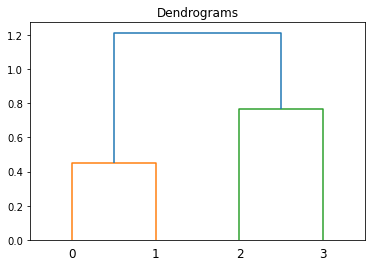

In [44]:
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

(b)

/var/folders/wf/cgnnphfs6fjbzlg451nf6y8w0000gn/T/ipykernel_66597/3458638043.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(data, 'single')


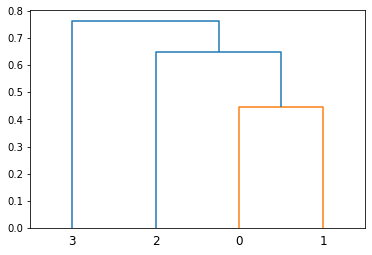

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data, 'single')
dn = dendrogram(Z)
plt.show()

(c) clusters(0,1) and (2,3)

(d) clusters (3) and ((0,1),2)

(e)

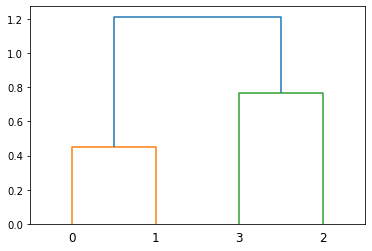

In [52]:
data1 =np.array([[0.3, 0, 0.5, 0.8],[0, 0.3, 0.4, 0.7],[0.7, 0.8, 0.45, 0.0],[0.4, 0.5, 0.0, 0.45]])
dend = shc.dendrogram(shc.linkage(data1, method='ward',optimal_ordering = True))